# Машинное обучение, ФКН ВШЭ

## Практическое задание 3. Градиентный спуск своими руками

### Общая информация
Дата выдачи: **01.11.2024**

Мягкий дедлайн: **13.11.24 23:59**

Жесткий дедлайн: **15.11.24 23:59**

### О задании

В данном задании необходимо реализовать обучение линейной регрессии с помощью различных вариантов градиентного спуска.


### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов + 2 балла бонус.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.
Также оценка может быть снижена за плохо читаемый код и плохо считываемые диаграммы.

Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.


### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-03-gd-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

**Оценка**: ...

Напомним, что на лекциях и семинарах мы разбирали некоторые подходы к оптимизации функционалов по параметрам. В частности, был рассмотрен градиентный спуск и различные подходы к его реализации — полный градиентный спуск, стохастический градиентный спуск, метод импульса и другие. В качестве модели у нас будет выступать линейная регрессия.

В этом домашнем задании вам предстоит реализовать 4 различных вариации градиентного спуска, написать свою реализацию линейной регресии, сравнить методы градиентного спуска между собой на реальных данных и ещё много чего веселого и интересного!

## Задание 1. Реализация градиентного спуска (3.5 балла)

В этом задании вам предстоит написать собственные реализации различных подходов к градиентному спуску с опорой на подготовленные шаблоны в файле `descents.py`.

**Все реализуемые методы должны быть векторизованы!**

### Лирическое-теоретическое отступление № 1

Основное свойство антиградиента &ndash; он указывает в сторону наискорейшего убывания функции в данной точке. Соответственно, будет логично стартовать из некоторой точки, сдвинуться в сторону антиградиента,
пересчитать антиградиент и снова сдвинуться в его сторону и т.д. Запишем это более формально.

Пусть $w_0$ &ndash; начальный набор параметров (например, нулевой или сгенерированный из некоторого
случайного распределения). Тогда ванильный градиентный спуск состоит в повторении следующих шагов до сходимости:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

### Лирическое-теоретическое отступление № 2

На семинаре про [матрично-векторное дифференцирование](https://github.com/esokolov/ml-course-hse/blob/master/2022-fall/seminars/sem03-vector-diff.pdf) вы должны были обсуждать дифференцирование функции потерь MSE в матричном виде.

### Задание 1.0. Градиент MSE в матричном виде (0.02 балла).

Напомним, что функция потерь MSE записывается в матричном виде как:

$$
    Q(w) = \dfrac{1}{\ell} \left( y - Xw \right)^T \left( y - Xw \right)
$$

Выпишите ниже (подсмотрев в семинар или решив самостоятельно) градиент для функции потерь MSE в матричном виде.

`### ваше решение тут ###`
$$ 
   Q(w) = \frac{1}{\ell} (y^T y - 2y^T Xw + w^T X^T Xw) 
 $$

Теперь найдем градиент $( \nabla Q(w) )$:
   - Градиент постоянного члена $( y^T y )$ равен 0;
   - Градиент $-2y^T Xw $ равен $( -2X^T y)$;
   - Градиент $( w^T X^T Xw)$ равен $( 2X^T Xw)$ (по правилам дифференцирования).


$$
\nabla Q(w) = \frac{1}{\ell} (-2X^T y + 2X^T Xw) 
$$


$$
\nabla Q(w) = \frac{2}{\ell} (X^T Xw - X^T y)
$$


$$
\nabla Q(w) = \frac{2}{\ell} (X^T Xw - X^T y)
$$

### Задание 1.1. Родительский класс BaseDescent (0.5 балла).

Реализуйте функции `calc_loss` (вычисление MSE для переданных $x$ и $y$) и `predict` (предсказание $y_{pred}$ для переданных $x$) в классе `BaseDescent`.

Все вычисления должны быть векторизованы.

### Задание 1.2. Полный градиентный спуск VanillaGradientDescent (0.5 балла).

Реализуйте полный градиентный спуск заполнив пропуски в классе `VanillaGradientDescent` в файле `descents.py`. Для вычисления градиента используйте формулу выше. Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

Здесь и далее функция `update_weights` должна возвращать разницу между $w_{k + 1}$ и $w_{k}$: $\quad w_{k + 1} - w_{k} = -\eta_{k} \nabla_{w} Q(w_{k})$. Кроме того, соответственно своему названию, она должна обновлять веса. 

Во всех методах градиентного спуска мы будем использовать следующую формулу для длины шага:

$$
    \eta_{k} = \lambda \left(\dfrac{s_0}{s_0 + k}\right)^p
$$

На практике достаточно настроить параметр $\lambda$, а остальным выставить параметры по умолчанию: $s_0 = 1, \, p = 0.5.$

### Лирическое-теоретическое отступление № 3

Как правило, в задачах машинного обучения функционал $Q(w)$ представим в виде суммы $\ell$ функций:

$$
    Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        q_i(w).
$$

В нашем домашнем задании отдельные функции $q_i(w)$ соответствуют ошибкам на отдельных объектах.

Проблема метода градиентного спуска состоит в том, что на каждом шаге необходимо вычислять градиент всей суммы (будем его называть полным градиентом):

$$
    \nabla_w Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        \nabla_w q_i(w).
$$

Это может быть очень трудоёмко при больших размерах выборки. В то же время точное вычисление градиента может быть не так уж необходимо &ndash; как правило, мы делаем не очень большие шаги в сторону антиградиента, и наличие в нём неточностей не должно сильно сказаться на общей траектории.

Оценить градиент суммы функций можно средним градиентов случайно взятого подмножества функций:

$$
    \nabla_{w} Q(w_{k}) \approx \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}),
$$
где $B$ - это случайно выбранное подмножество индексов.

В этом случае мы получим метод **стохастического градиентного спуска**.

### Задание 1.3. Стохастический градиентный спуск StochasticDescent (0.5 балла).

Реализуйте стохастический градиентный спуск заполнив пропуски в классе `StochasticDescent`. Для оценки градиента используйте формулу выше (среднее градиентов случайно выбранного батча объектов). Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}).
$$

Размер батча будет являться гиперпараметром метода, семплируйте индексы для батча объектов с помощью `np.random.randint`.

### Лирическое-теоретическое отступление № 4

Может оказаться, что направление антиградиента сильно меняется от шага к шагу. Например, если линии уровня функционала сильно вытянуты, то из-за ортогональности градиента линиям уровня он будет менять направление на почти противоположное на каждом шаге. Такие осцилляции будут вносить сильный шум в движение, и процесс оптимизации займёт много итераций. Чтобы избежать этого, можно усреднять векторы антиградиента с нескольких предыдущих шагов &ndash; в этом случае шум уменьшится, и такой средний вектор будет указывать в сторону общего направления движения. Введём для этого вектор инерции:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k})
\end{align}

Здесь $\alpha$ &ndash; параметр метода, определяющей скорость затухания градиентов с предыдущих шагов. Разумеется, вместо вектора градиента может быть использована его аппроксимация. Чтобы сделать шаг градиентного спуска, просто сдвинем предыдущую точку на вектор инерции:

$$
    w_{k + 1} = w_{k} - h_{k + 1}.
$$

Заметим, что если по какой-то координате градиент постоянно меняет знак, то в результате усреднения градиентов в векторе инерции эта координата окажется близкой к нулю. Если же по координате знак градиента всегда одинаковый, то величина соответствующей координаты в векторе инерции будет большой, и мы будем делать большие шаги в соответствующем направлении.

### Задание 1.4 Метод Momentum MomentumDescent (0.5 балла).

Реализуйте градиентный спуск с методом инерции заполнив пропуски в классе `MomentumDescent`. Шаг оптимизации:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k}) \\
    &w_{k + 1} = w_{k} - h_{k + 1}.
\end{align}

$\alpha$ будет являться гиперпараметром метода, но в данном домашнем задании мы зафиксируем её за вас $\alpha = 0.9$.

### Лирическое-теоретическое отступление № 5

Градиентный спуск очень чувствителен к выбору длины шага. Если шаг большой, то есть риск, что мы будем перескакивать через точку минимума; если же шаг маленький, то для нахождения минимума потребуется много итераций. При этом нет способов заранее определить правильный размер шага &ndash; к тому же, схемы с постепенным уменьшением шага по мере итераций могут тоже плохо работать.

В методе AdaGrad предлагается сделать свою длину шага для каждой компоненты вектора параметров. При этом шаг будет тем меньше, чем более длинные шаги мы делали на предыдущих итерациях:

\begin{align}
    &G_{kj} = G_{k-1,j} + (\nabla_w Q(w_{k - 1}))_j^2; \\
    &w_{jk} = w_{j,k-1} - \frac{\eta_t}{\sqrt{G_{kj}} + \varepsilon} (\nabla_w Q(w_{k - 1}))_j.
\end{align}

Здесь $\varepsilon$ небольшая константа, которая предотвращает деление на ноль.

В данном методе можно зафксировать длину шага (например, $\eta_k = 0.01$) и не подбирать её в процессе обучения **(обратите внимание, что в данном домашнем задании длина шага не фиксируется)**. Отметим, что данный метод подходит для разреженных задач, в которых у каждого объекта большинство признаков равны нулю. Для признаков, у которых ненулевые значения встречаются редко, будут делаться большие шаги; если же какой-то признак часто является ненулевым, то шаги по нему будут небольшими.

У метода AdaGrad есть большой недостаток: переменная $G_{kj}$ монотонно растёт, из-за чего шаги становятся всё медленнее и могут остановиться ещё до того, как достигнут минимум функционала. Проблема решается в методе RMSprop, где используется экспоненциальное затухание градиентов:

$$
    G_{kj} = \alpha G_{k-1,j} + (1 - \alpha) (\nabla_w Q(w^{(k-1)}))_j^2.
$$

В этом случае размер шага по координате зависит в основном от того, насколько
быстро мы двигались по ней на последних итерациях.

Можно объединить идеи описанных выше методов: накапливать градиенты со всех прошлых шагов для
избежания осцилляций и делать адаптивную длину шага по каждому параметру.

### Задание 1.5. Метод Adam (Adaptive Moment Estimation) (1.5 балла).

Реализуйте градиентный спуск с методом Adam заполнив пропуски в классе `Adam`. Шаг оптимизации:

\begin{align}
    &m_0 = 0, \quad v_0 = 0; \\ \\
    &m_{k + 1} = \beta_1 m_k + (1 - \beta_1) \nabla_w Q(w_{k}); \\ \\
    &v_{k + 1} = \beta_2 v_k + (1 - \beta_2) \left(\nabla_w Q(w_{k})\right)^2; \\ \\
    &\widehat{m}_{k} = \dfrac{m_k}{1 - \beta_1^{k}}, \quad \widehat{v}_{k} = \dfrac{v_k}{1 - \beta_2^{k}}; \\ \\
    &w_{k + 1} = w_{k} - \dfrac{\eta_k}{\sqrt{\widehat{v}_{k + 1}} + \varepsilon} \widehat{m}_{k + 1}.
\end{align}

$\beta_1 = 0.9, \beta_2 = 0.999$ и $\varepsilon = 10^{-8}$ будут зафиксированы за вас.

## Задание 2. Реализация линейной регресии (0.5 балла)

В этом задании вам предстоит написать свою реализацию линейной регресии, обучаемой с использованием градиентного спуска, с опорой на подготовленные шаблоны в файле `linear_regression.py` - **LinearRegression**. По сути линейная регрессия будет оберткой, которая запускает обучение 

Необходимо соблюдать следующие условия:

* Все вычисления должны быть векторизованы;
* Циклы средствами python допускаются только для итераций градиентного спуска;
* В качестве критерия останова необходимо использовать (одновременно):
    * Квадрат евклидовой нормы разности весов на двух соседних итерациях меньше `tolerance`;
    * Разность весов содержит наны;
    * Достижение максимального числа итераций `max_iter`.
* Будем считать, что все данные, которые поступают на вход имеют столбец единичек последним столбцом;
* Веса модели надо обновлять внутри функции `update_weights`, она неспроста так называется
* Чтобы проследить за сходимостью оптимизационного процесса будем использовать `loss_history`, в нём будем хранить значения функции потерь до каждого шага, начиная с нулевого (до первого шага по антиградиенту) и значение функции потерь после оптимизации.

## Задание 3. Проверка кода (0 баллов)

In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

import numpy as np

from descents import get_descent
from linear_regression import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score


In [3]:
num_objects = 100
dimension = 5

x = np.random.rand(num_objects, dimension)
y = np.random.rand(num_objects)

In [4]:
# Descents

descent_config = {
    'descent_name': 'some name that we will replace in the future',
    'kwargs': {
        'dimension': dimension
    }
}

for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    descent_config['descent_name'] = descent_name
    descent = get_descent(descent_config)

    diff = descent.step(x, y)
    gradient = descent.calc_gradient(x, y)
    predictions = descent.predict(x)

    assert gradient.shape[0] == dimension, f'Gradient failed for descent {descent_name}'
    assert diff.shape[0] == dimension, f'Weights failed for descent {descent_name}'
    assert predictions.shape == y.shape, f'Prediction failed for descent {descent_name}'

In [5]:
# LinearRegression

max_iter = 10
tolerance = 0

descent_config = {
    'descent_name': 'stochastic',
    'kwargs': {
        'dimension': dimension,
        'batch_size': 10
    }
}

regression = LinearRegression(
    descent_config=descent_config,
    tolerance=tolerance,
    max_iter=max_iter
)

regression.fit(x, y)

assert len(regression.loss_history) == max_iter + 1, 'Loss history failed'

Если ваше решение прошло все тесты локально, то теперь пришло время протестировать его в [Яндекс Контесте](https://contest.yandex.ru/contest/54610/).

Для каждой задачи из контеста вставьте ссылку на успешную посылку:

* **VanillaGradientDescent**: https://contest.yandex.ru/contest/54610/run-report/124129632/


* **StochasticDescent**: https://contest.yandex.ru/contest/54610/run-report/124129648/


* **MomentumDescent**: https://contest.yandex.ru/contest/54610/run-report/124129911/


* **Adam**: https://contest.yandex.ru/contest/54610/run-report/124685284/


* **LinearRegression**: https://contest.yandex.ru/contest/54610/run-report/124205488/

## Задание 4. Работа с данными (1 балл)

Мы будем использовать датасет объявлений по продаже машин на немецком Ebay. В задаче предсказания целевой переменной для нас будет являться цена.

* Постройте график распределения целевой переменной в данных, подумайте, нужно ли заменить её на логарифм. Присутствуют ли выбросы в данных с аномальной ценой? Если да, то удалите их из данных.

* Проведите исследование данных:
    * Проанализируйте тип столбцов, постройте графики зависимости целевой переменной от признака, распределения значений признака;
    * Подумайте (и напишите): какие признаки могут быть полезными на основе этих графиков, обработайте выбросы;
    * Подумайте (и напишите): какие трансформации признаков из известных вам будет уместно применить;
    * Разделите полезные признаки на категориальные, вещественные и те, которые не надо предобрабатывать.
* Разделите данные на обучающую, валидационную и тестовую выборки в отношении 8:1:1.

In [42]:
import numpy as np
import pandas as pd  # при желании, можете заменить на polars/pyspark или что угодно, что вам нравится

import matplotlib.pyplot as plt
import seaborn as sns

from descents import get_descent
from linear_regression import LinearRegression

import ast

sns.set(style='darkgrid')

In [43]:
data = pd.read_csv('autos.csv')  # разумеется, если вы используете не pandas, это надо поменять

In [44]:
data['log_price'] = np.log1p(data['price'])

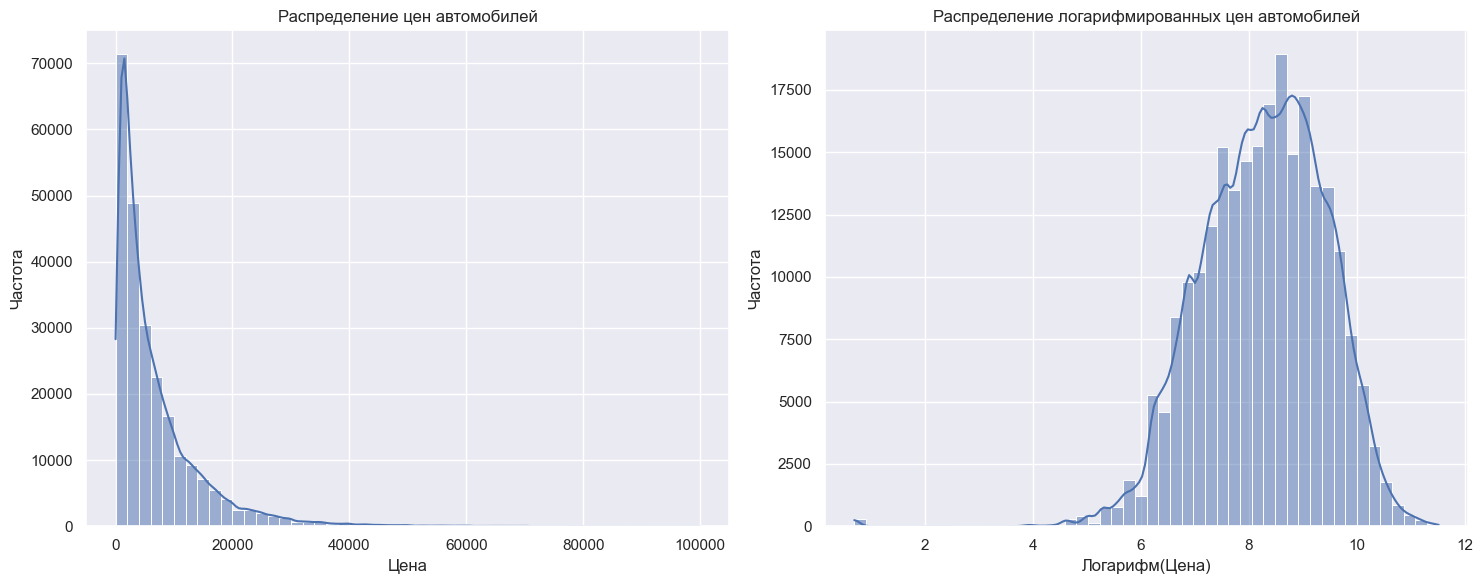

In [45]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

sns.histplot(data['price'], bins=50, kde=True, ax=axes[0])
axes[0].set_title('Распределение цен автомобилей')
axes[0].set_xlabel('Цена')
axes[0].set_ylabel('Частота')

sns.histplot(data['log_price'], bins=50, kde=True, ax=axes[1])
axes[1].set_title('Распределение логарифмированных цен автомобилей')
axes[1].set_xlabel('Логарифм(Цена)')
axes[1].set_ylabel('Частота')

plt.tight_layout()
plt.show()

Судя по графику, логарифмированные цены получаются более сглаженными, размах в значениях меньше, что делает данные более хорошими для обучения линейной регрессии

уберем полные дубли, на семе у Полины Вячеславовны решали задачу, в которой дублирование значимость уменьшало, так что лучше убрать.

In [46]:
data = data.drop_duplicates()

Уберем большие выбросы по таргету

In [47]:
data_cleaned = data[(data['price'] >= data['price'].quantile(0.1)) & (data['price'] <= data['price'].quantile(0.9))]

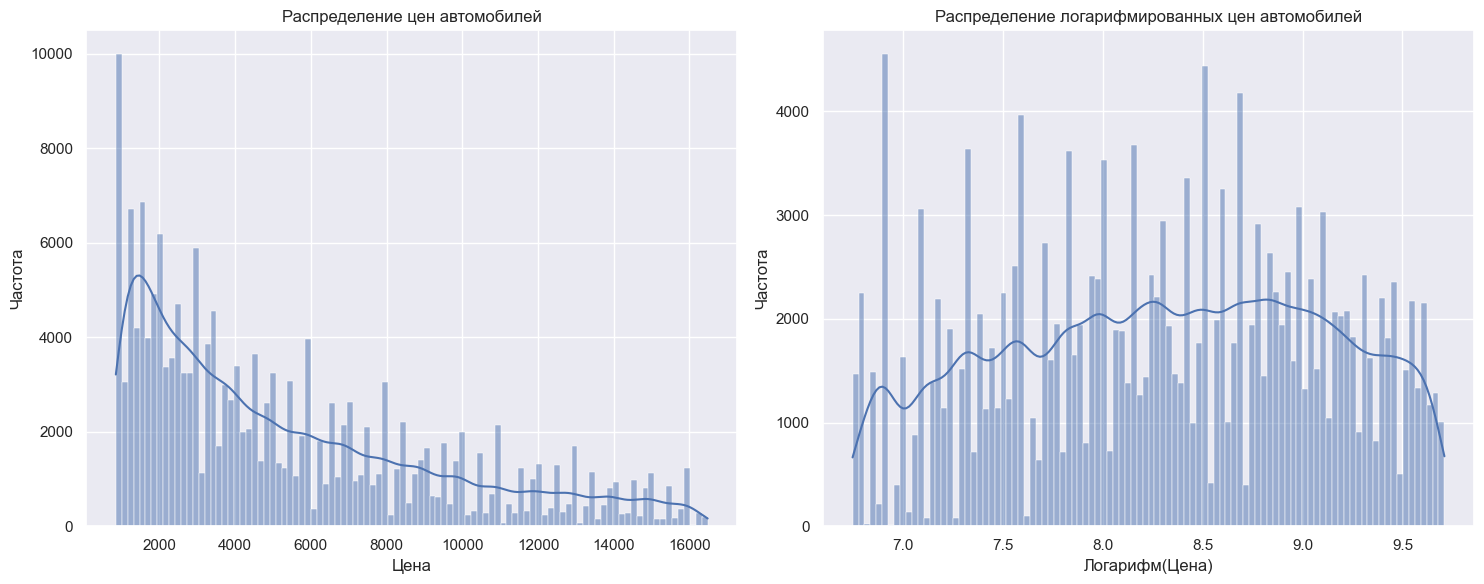

In [48]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

sns.histplot(data_cleaned['price'], bins=100, kde=True, ax=axes[0])
axes[0].set_title('Распределение цен автомобилей')
axes[0].set_xlabel('Цена')
axes[0].set_ylabel('Частота')

sns.histplot(data_cleaned['log_price'], bins=100, kde=True, ax=axes[1])
axes[1].set_title('Распределение логарифмированных цен автомобилей')
axes[1].set_xlabel('Логарифм(Цена)')
axes[1].set_ylabel('Частота')

plt.tight_layout()
plt.show()

Колонки в данных:

* `brand` - название бренда автомобиля
* `model` - название модели автомобиля
* `vehicleType` - тип транспортного средства
* `gearbox` - тип трансмисcии
* `fuelType` - какой вид топлива использует автомобиль
* `notRepairedDamage` - есть ли в автомобиле неисправность, которая еще не устранена
* `powerPS` - мощность автомобиля в PS (метрическая лошадиная сила)
* `kilometer` - сколько километров проехал автомобиль, пробег
* `autoAgeMonths` - возраст автомобиля в месяцах


* `price` - цена, указанная в объявлении о продаже автомобиля (целевая переменная)

##### Изучим отдельно все признаки:

Числовые значения:

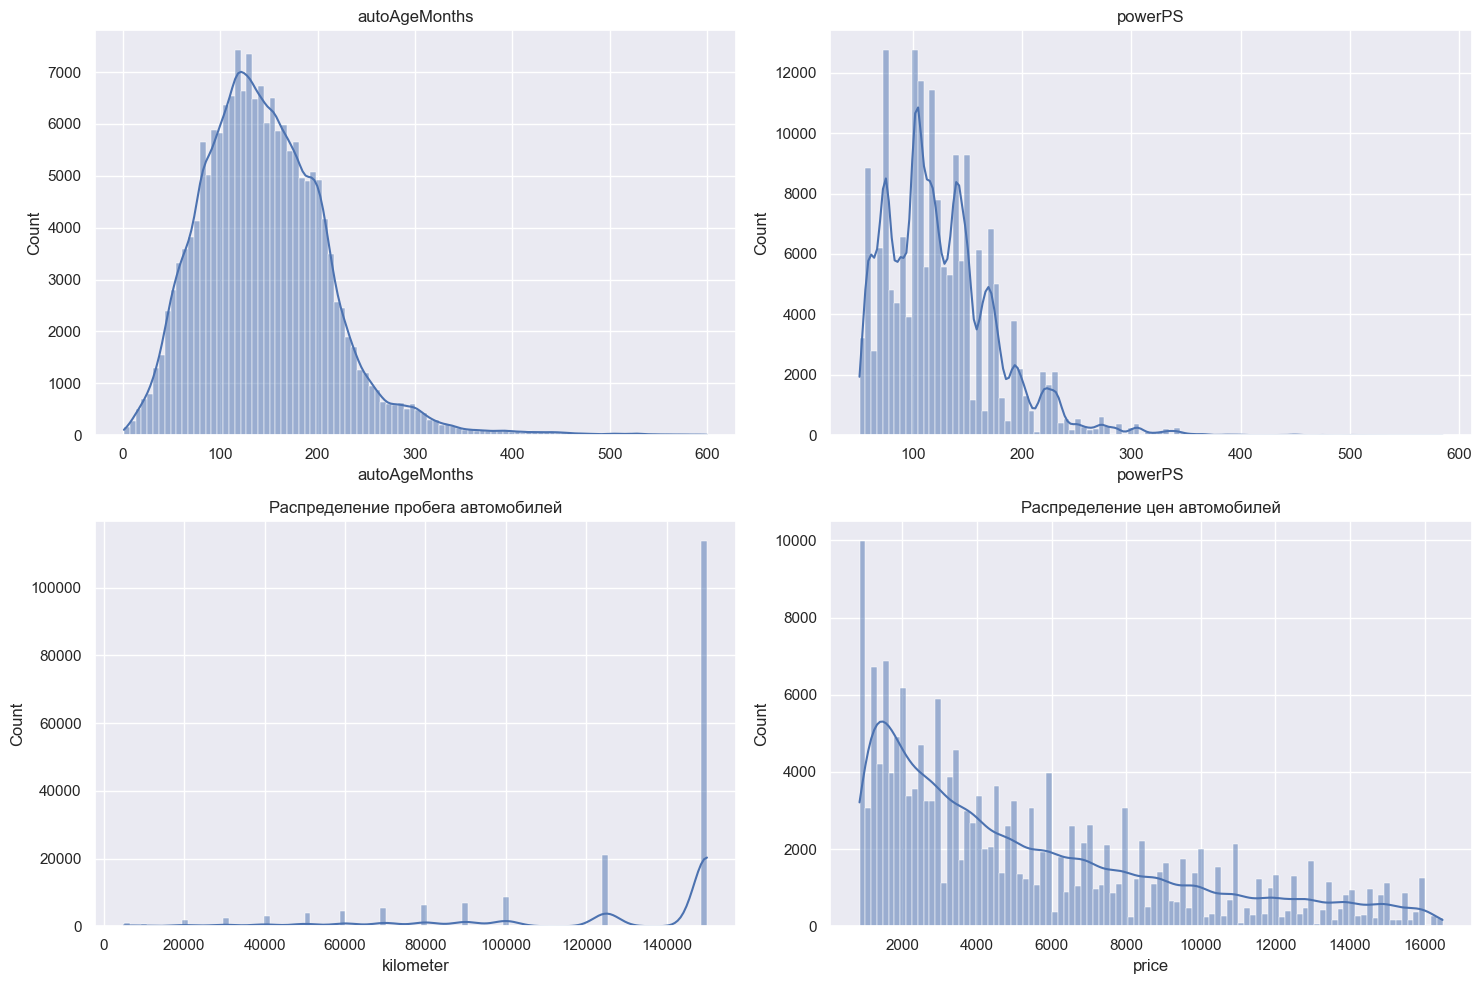

In [49]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.histplot(data_cleaned['autoAgeMonths'], bins=100, kde=True)
plt.title('autoAgeMonths')

plt.subplot(2, 2, 2)
sns.histplot(data_cleaned['powerPS'], bins=100, kde=True)
plt.title('powerPS')

plt.subplot(2, 2, 3)
sns.histplot(data_cleaned['kilometer'], bins=100, kde=True)
plt.title('Распределение пробега автомобилей')

plt.subplot(2, 2, 4)
sns.histplot(data_cleaned['price'], bins=100, kde=True)
plt.title('Распределение цен автомобилей')

plt.tight_layout()
plt.show()

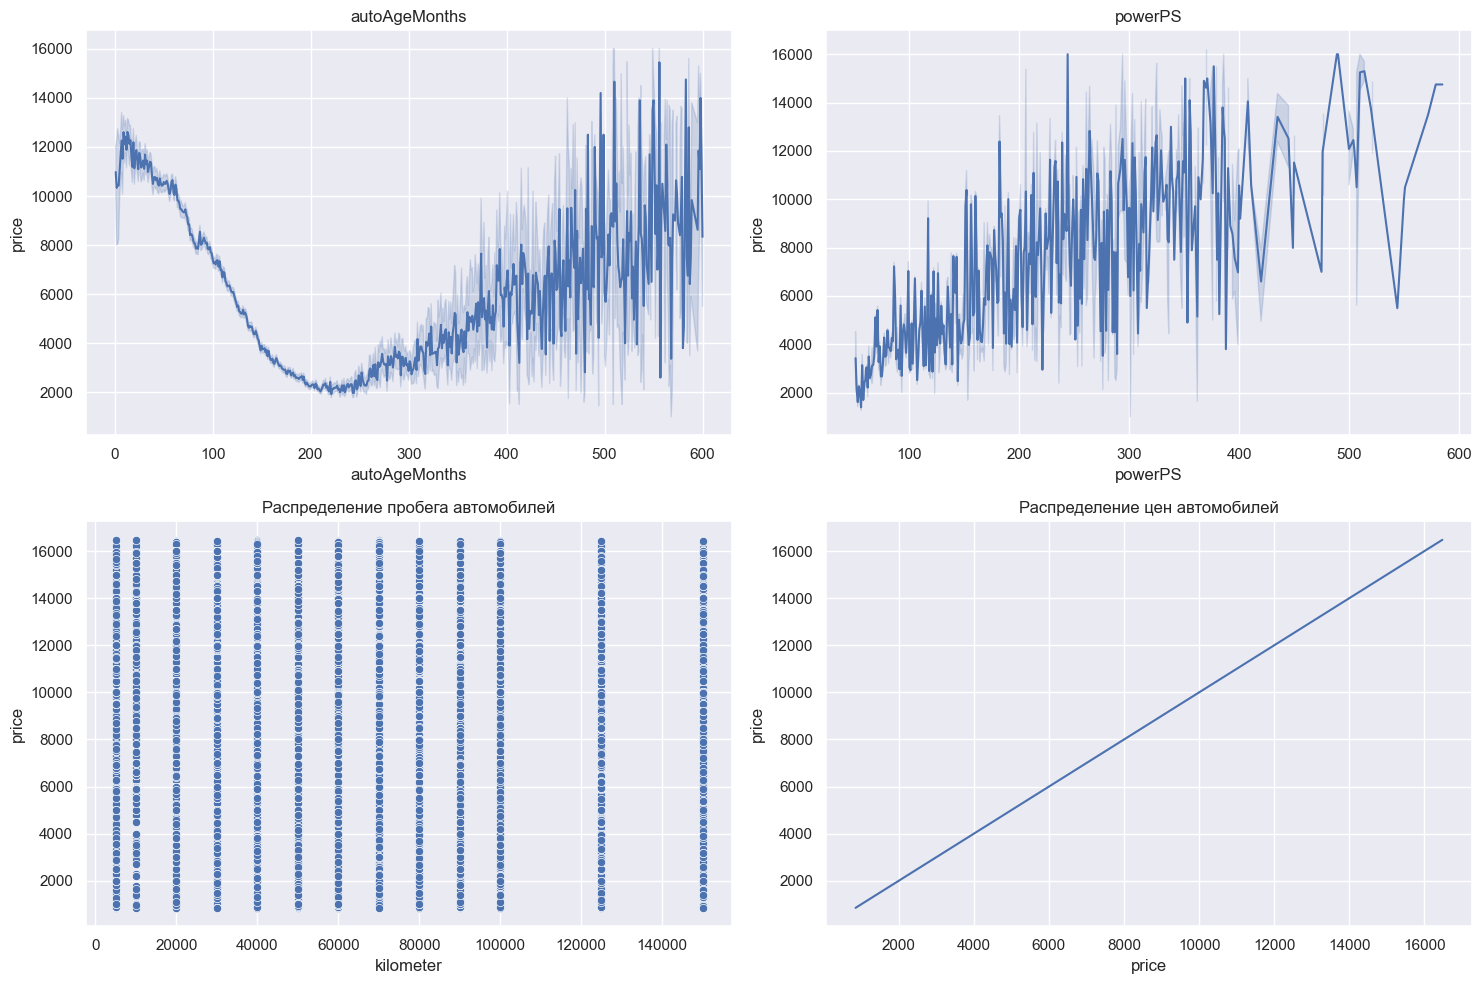

In [50]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.lineplot(data=data_cleaned, x='autoAgeMonths', y='price', sizes=(20, 200))
plt.title('autoAgeMonths')

plt.subplot(2, 2, 2)
sns.lineplot(data=data_cleaned, x='powerPS', y='price', sizes=(20, 200))
plt.title('powerPS')

plt.subplot(2, 2, 3)
sns.scatterplot(data=data_cleaned, x='kilometer', y='price', sizes=(20, 200))
plt.title('Распределение пробега автомобилей')

plt.subplot(2, 2, 4)
sns.lineplot(data=data_cleaned, x='price', y='price', sizes=(20, 200))
plt.title('Распределение цен автомобилей')

plt.tight_layout()
plt.show()

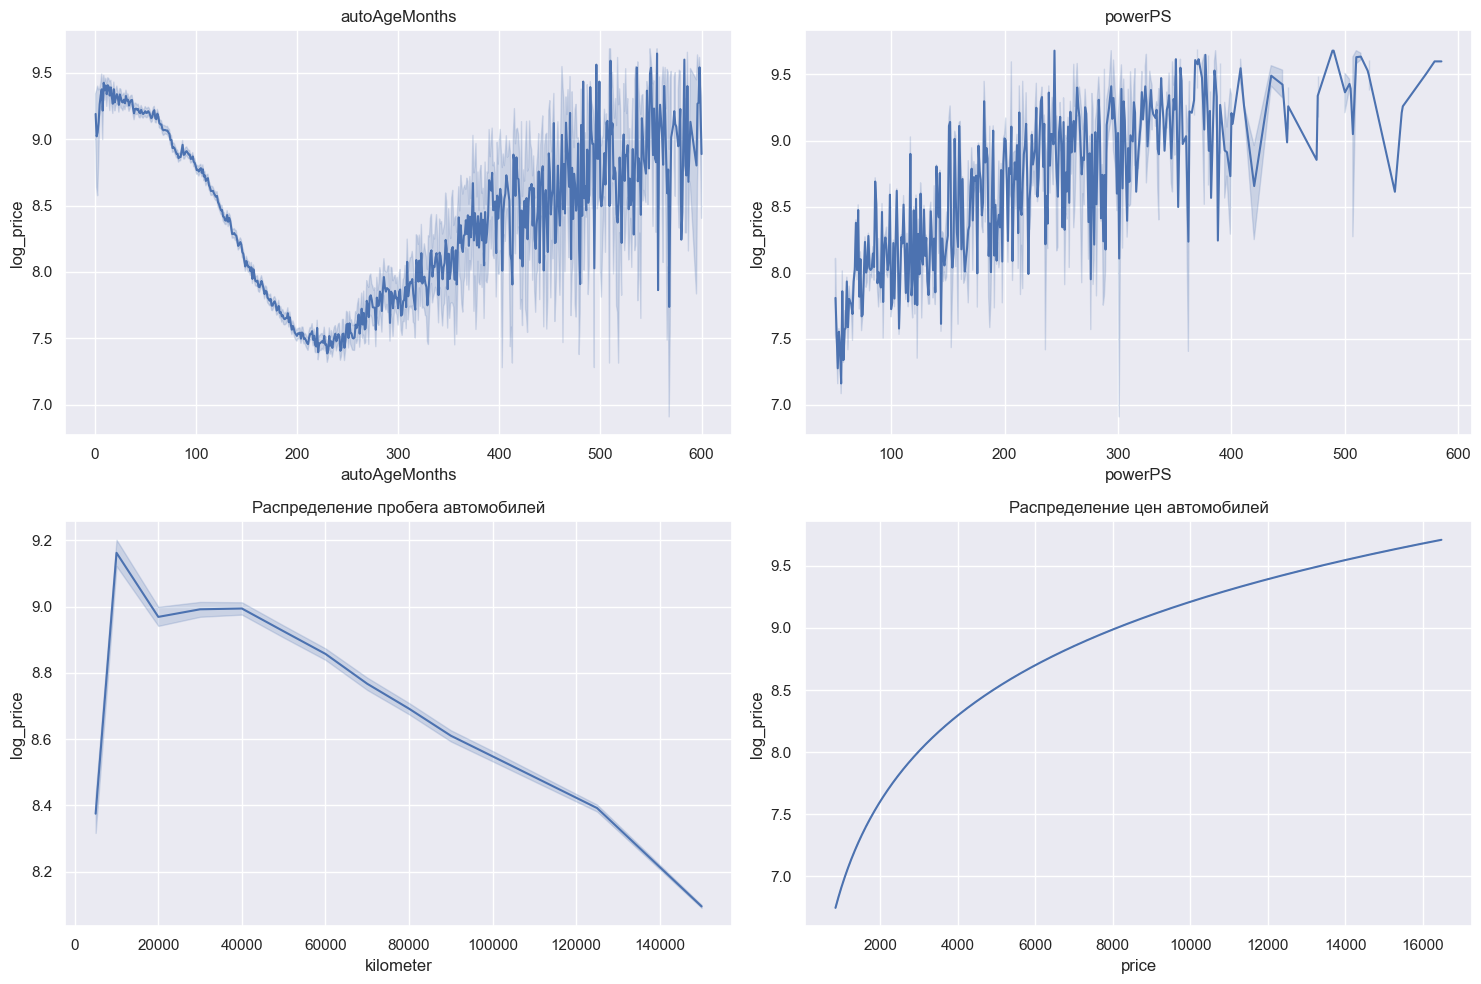

In [51]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.lineplot(data=data_cleaned, x='autoAgeMonths', y='log_price', sizes=(20, 200))
plt.title('autoAgeMonths')

plt.subplot(2, 2, 2)
sns.lineplot(data=data_cleaned, x='powerPS', y='log_price', sizes=(20, 200))
plt.title('powerPS')

plt.subplot(2, 2, 3)
sns.lineplot(data=data_cleaned, x='kilometer', y='log_price', sizes=(20, 200))
plt.title('Распределение пробега автомобилей')

plt.subplot(2, 2, 4)
sns.lineplot(data=data_cleaned, x='price', y='log_price', sizes=(20, 200))
plt.title('Распределение цен автомобилей')

plt.tight_layout()
plt.show()

1. Признак kilometer следует сделать бинарным, так как он принимает ограниченное число значений.
2. По графикам видно, что логарифмирование сделало данные более сконцентрированными, что может сделать модель более точной
3. Чем больше мощность, тем дороже машина - это естественная заивисмость между переменными
4. Также набюдается отрицательная зависимость размера пробега от логарифмированной цены, что тоже соотвествует действительности, так как автомобили изнашиваются
5. Очень новые машины действительно дороже, однако начиная с некоторого возраста машины становятся раритеными, их цена значительно растет, этим объясняется выпуклой функцией
5. График в правом нижнем углу насыщен экономическим смыслом

Чисто категориальные признаки

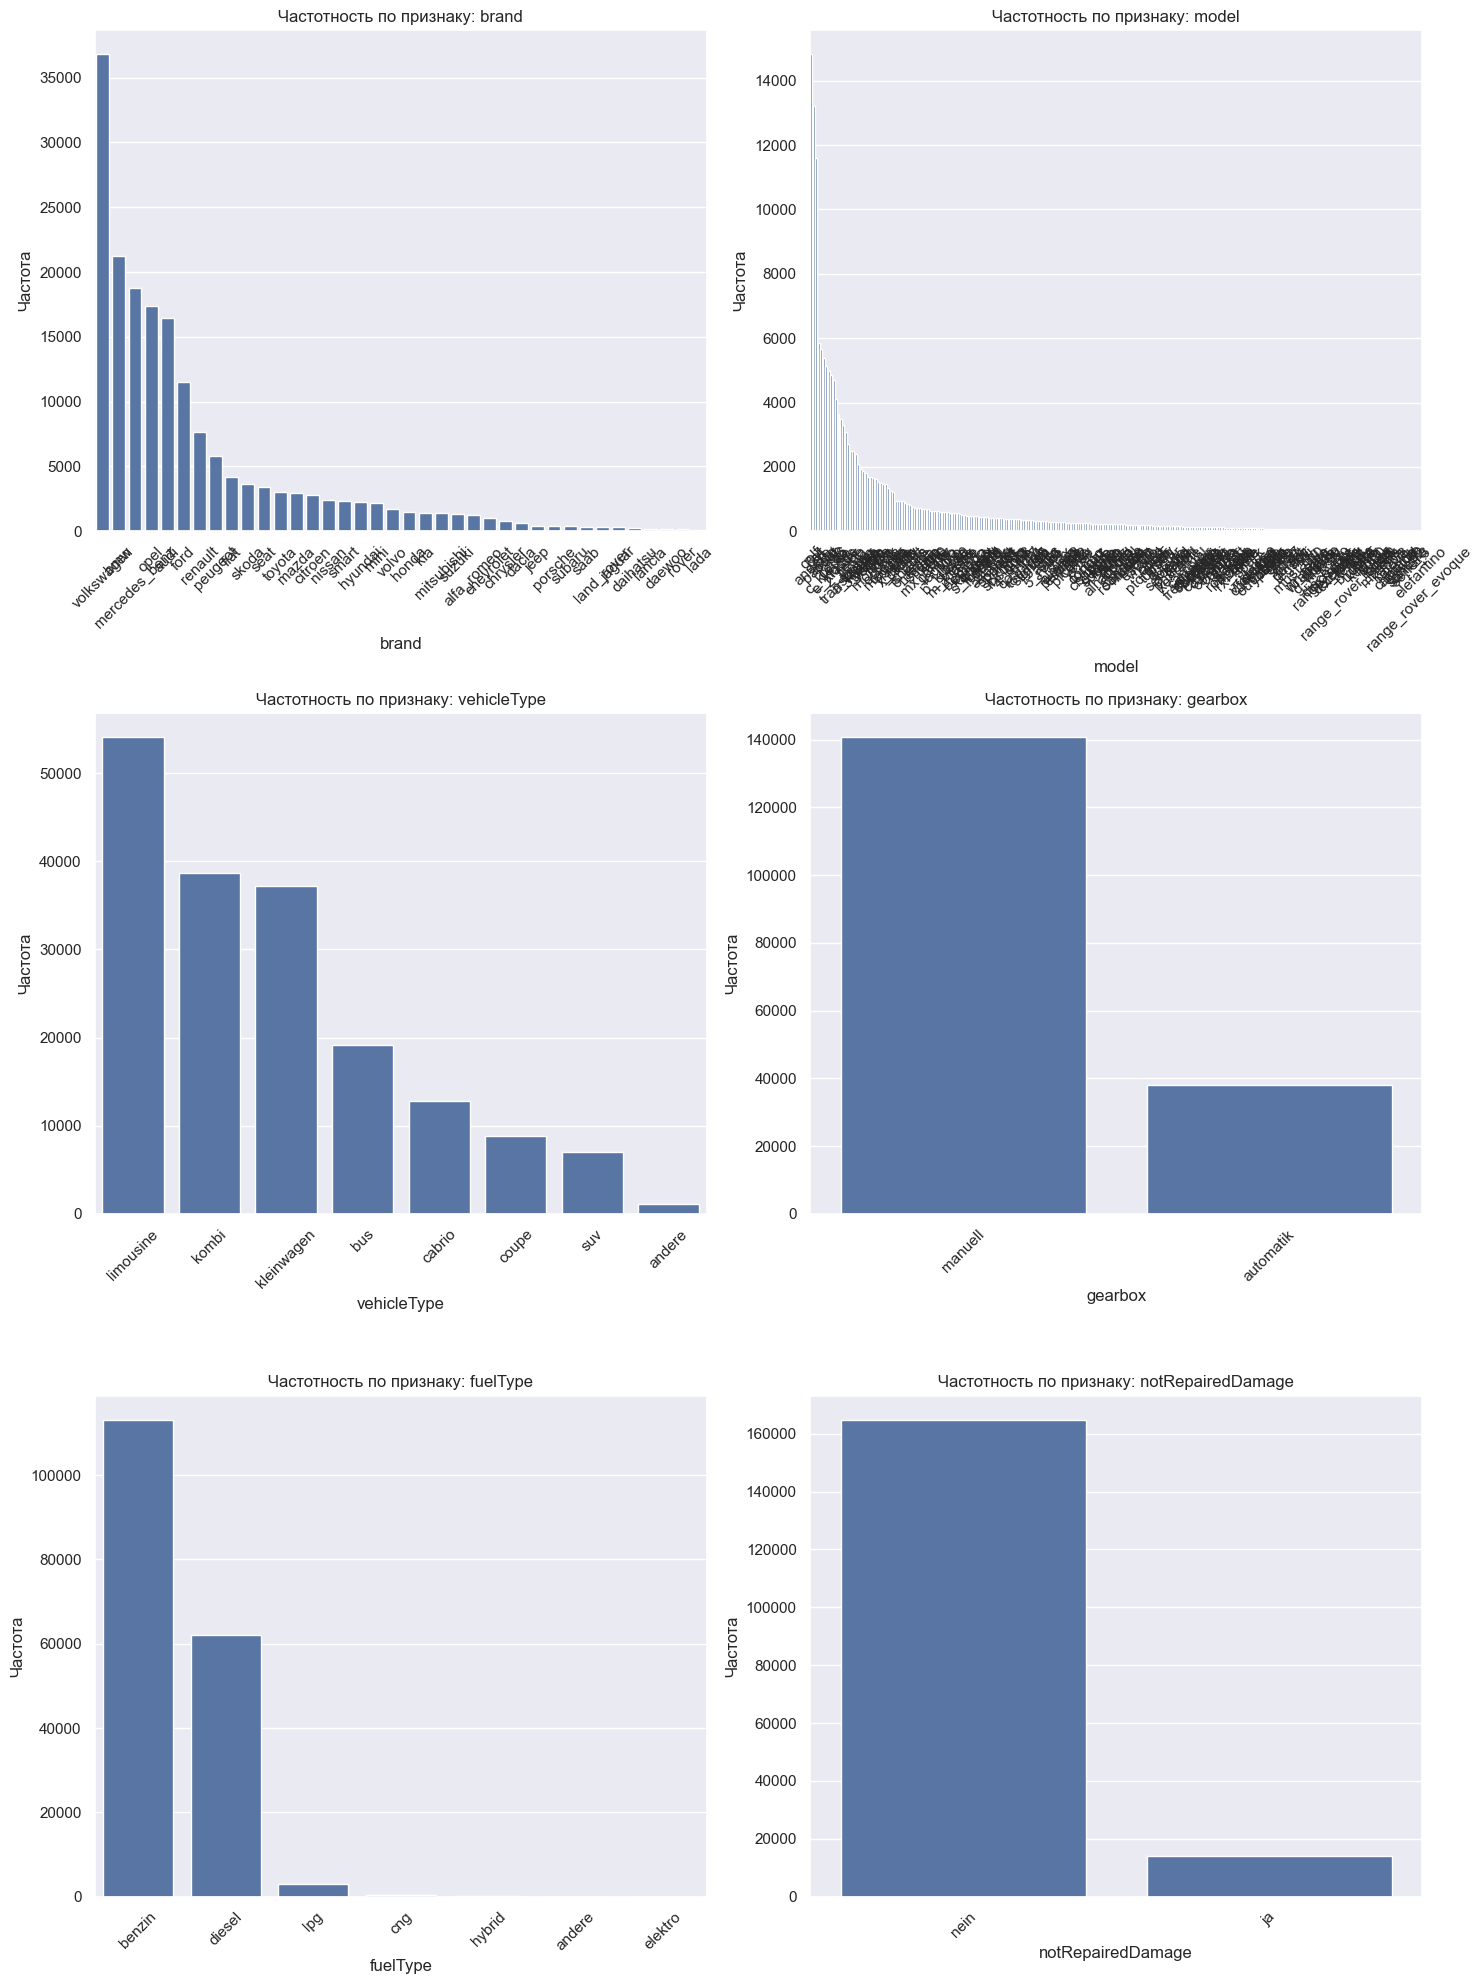

In [52]:
features = ['brand', 'model', 'vehicleType', 'gearbox', 'fuelType', 'notRepairedDamage']

plt.figure(figsize=(15, 20))

for i, feature in enumerate(features, 1):
    plt.subplot(3, 2, i)
    sns.countplot(data=data_cleaned, x=feature, order=data_cleaned[feature].value_counts().index)
    plt.title(f'Частотность по признаку: {feature}')
    plt.xticks(rotation=45)
    plt.xlabel(feature)
    plt.ylabel('Частота')

plt.tight_layout()
plt.show()

1. Признаки 'brand' и 'model' состоят из огромного числа значений, лучше всего их не учитывать в задаче регресии, так как мы так .
2. 'gearbox' и 'notRepairedDamage' - переведем в бинарные признаки.
3. 'vehicleType' - признак без явных выбросов, достаточно сглаженные данные получаются, можно использовать как категориальный
4. Признак 'fuelType' имеет 3 явно наиболее частотные типа, остальные - редкие, но легко также сделать one-hot кодирование, однако, в целом можно 4 последних типа объединить в один - 'other', так как их не так много

Подытожим:

In [53]:
categorical = ['fuelType', 'vehicleType', 'gearbox', 'notRepairedDamage', 'kilometer']
numeric = ['powerPS', 'autoAgeMonths']
other = []

data_cleaned['gearbox'] = data_cleaned['gearbox'].map({'manuell': 0, 'automatik': 1})
data_cleaned['notRepairedDamage'] = data_cleaned['notRepairedDamage'].map({'nein': 0, 'ja': 1})
data_cleaned['fuelType'] = data_cleaned['fuelType'].map({'benzin':'benzin', 'diesel':'diesel', 'lpg':'lpg', 
                                              'cng':'other',  'hybrid':'other', 'andere':'other', 'elektro':'other' })

/var/folders/c1/2f76vwg555g_fgmfcx7m_j2w0000gn/T/ipykernel_18262/1496997691.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['gearbox'] = data_cleaned['gearbox'].map({'manuell': 0, 'automatik': 1})
/var/folders/c1/2f76vwg555g_fgmfcx7m_j2w0000gn/T/ipykernel_18262/1496997691.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['notRepairedDamage'] = data_cleaned['notRepairedDamage'].map({'nein': 0, 'ja': 1})
/var/folders/c1/2f76vwg555g_fgmfcx7m_j2w0000gn/T/ipykernel_18262/149699769

Какие еще трансформации можно применить - видно, что признак autoAgeMonths хорошо описывался бы нелинейным признаком, так как не является монотонным относильно таргета, можно было бы его предлоразовать в квадратичный дляулучшения точности. Остальные валидные трансформации применила и описала.

In [54]:
data_cleaned['bias'] = 1
other += ['bias']

x = data_cleaned[categorical + numeric + other]
y = data_cleaned['log_price']

/var/folders/c1/2f76vwg555g_fgmfcx7m_j2w0000gn/T/ipykernel_18262/1260283235.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['bias'] = 1


In [55]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler


column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore'), categorical),
    ('scaling', StandardScaler(), numeric),
    ('other',  'passthrough', other)
])

x = column_transformer.fit_transform(x)

In [56]:
# YOUR CODE (data split into train/val/test):

X_train, X_temp, y_train, y_temp = train_test_split(x, y, test_size=0.1, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

## Задание 5. Сравнение методов градиентного спуска (2 балла)

В этом задании вам предстоит сравнить методы градиентного спуска на подготовленных вами данных из предыдущего задания.

### Задание 5.1. Подбор оптимальной длины шага (1 балл)

Подберите по валидационной выборке наилучшую длину шага $\lambda$ для каждого метода с точки зрения ошибки. Для этого сделайте перебор по логарифмической сетке. Для каждого метода посчитайте ошибку на обучающей и тестовой выборках, посчитайте качество по метрике $R^2$, сохраните количество итераций до сходимости.

Все параметры кроме `lambda_` стоит выставить равным значениям по умолчанию.

In [57]:
def train_model(descent_name, lambda_, X_train, y_train, X_val, y_val, X_test, y_test):
    
    descent_config = {
        'descent_name': descent_name,
        'kwargs': {'dimension': X_train.shape[1], 'lambda_': lambda_}
    }

    model = LinearRegression(descent_config=descent_config)
    model.fit(X_train, y_train.to_numpy())
    
    valid_error = model.calc_loss(X_val, y_val.to_numpy())
    train_error = model.calc_loss(X_train, y_train.to_numpy())
    test_error = model.calc_loss(X_test, y_test.to_numpy())
    
    Y_train_pred = model.predict(X_train)
    Y_test_pred = model.predict(X_test)
    
    r2_train = r2_score(y_train, Y_train_pred)
    r2_test = r2_score(y_test, Y_test_pred)
    
    return valid_error, train_error, test_error, r2_train, r2_test, model.loss_history


func = ['full', 'stochastic', 'momentum', 'adam']
results = {i: {} for i in func}

lambda_values = np.logspace(-4, -0.5, 4)

for descent_name in func:
    best_lambda = None
    best_valid_error = np.inf
    
    for lambda_ in lambda_values:
        val_mse, train_error, test_error, r2_train, r2_test, loss_history = train_model(descent_name, lambda_, X_train, y_train, X_val, y_val, X_test, y_test)
        
        if val_mse < best_valid_error:
            best_valid_error = val_mse
            best_lambda = lambda_

            results[descent_name] = {
                'method': descent_name,
                'lambda': best_lambda,
                'train_error': train_error,
                'test_error': test_error,
                'r2_train': r2_train,
                'r2_test': r2_test,
                'loss_history': loss_history,
                'iters':len(loss_history)
            }

results

{'full': {'method': 'full',
  'lambda': np.float64(0.31622776601683794),
  'train_error': np.float64(0.32080829788578274),
  'test_error': np.float64(0.32457018652285874),
  'r2_train': 0.4968136457135178,
  'r2_test': 0.4847456149649001,
  'loss_history': [np.float64(18.198001594239713),
   np.float64(7.876749549320807),
   np.float64(1.5875334565070227),
   np.float64(0.5855590962190677),
   np.float64(0.48752489595061954),
   np.float64(0.4501809314809266),
   np.float64(0.42751652361451187),
   np.float64(0.41209280043933694),
   np.float64(0.4006467117639809),
   np.float64(0.39158973360866406),
   np.float64(0.38408441709851104),
   np.float64(0.3776570554375154),
   np.float64(0.3720220830613285),
   np.float64(0.3669970950780123),
   np.float64(0.36245932834342715),
   np.float64(0.35832222589762824),
   np.float64(0.3545222270703425),
   np.float64(0.35101100117827555),
   np.float64(0.3477506987178545),
   np.float64(0.3447109387684536),
   np.float64(0.341866830729991),
   n

In [58]:
results_list = []
for method, metrics in results.items():
    if metrics: 
        results_list.append(metrics)

results_df = pd.DataFrame(results_list)
results_df

,method,lambda,train_error,test_error,r2_train,r2_test,loss_history,iters
0,full,0.316228,0.320808,0.324570,0.496814,0.484746,"[18.198001594239713, 7.876749549320807, 1.5875...",31
1,stochastic,0.316228,0.298802,0.298891,0.531330,0.525511,"[32.69244292762636, 17.029929034690444, 3.1859...",103
2,momentum,0.316228,0.240449,0.236486,0.622856,0.624579,"[26.467631243904954, 11.71476150177998, 37.046...",89
3,adam,0.316228,0.231871,0.230903,0.636311,0.633441,"[26.933548804780244, 14.812149809904557, 7.760...",71


### Задание 5.2. Сравнение методов (1 балла) 

Постройте график зависимости ошибки на обучающей выборке от номера итерации (все методы на одном графике).

Посмотрите на получившиеся результаты (таблички с метриками и график). Сравните методы между собой.

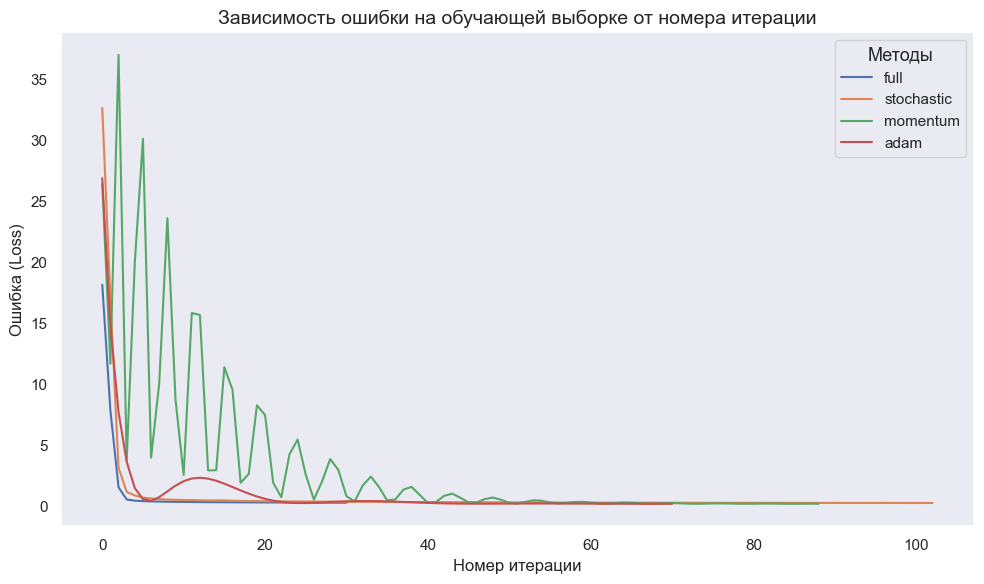

In [59]:
plt.figure(figsize=(10, 6)) 

for method, res in results.items():
    index = range(len(res['loss_history'])) 
    plt.plot(index, res['loss_history'], label=method)

plt.title('Зависимость ошибки на обучающей выборке от номера итерации', fontsize=14)
plt.xlabel('Номер итерации', fontsize=12)
plt.ylabel('Ошибка (Loss)', fontsize=12)

plt.grid()
plt.legend(title='Методы', title_fontsize='13', fontsize='11')
plt.tight_layout()
plt.show()

`### ваше решение тут ###`

## Задание 6. Стохастический градиентный спуск и размер батча (1 балл)

В этом задании вам предстоит исследовать влияние размера батча на работу стохастического градиентного спуска. 

* Сделайте по несколько запусков (например, k = 10) стохастического градиентного спуска на обучающей выборке для каждого размера батча из перебираемого списка. Замерьте время в секундах и количество итераций до сходимости. Посчитайте среднее этих значений для каждого размера батча.
* Постройте график зависимости количества шагов до сходимости от размера батча. _(под сходимостью понимается достижение критерия останова)_
* Постройте график зависимости времени до сходимости от размера батча.

Посмотрите на получившиеся результаты. Какие выводы можно сделать про подбор размера батча для стохастического градиентного спуска?

In [67]:
import time

In [68]:
batch_sizes = np.arange(5, 500, 10)
k = 10
res = []


for size in batch_sizes:
    iters = []
    times  = []
    descent_config = {
        'descent_name': 'stochastic', 
        'kwargs': {
            'dimension': X_train.shape[1],
            'lambda_': 0.316228,
            'batch_size': size
        }
    }

    model = LinearRegression(
        descent_config=descent_config
    )
    for _ in range(k):
        start = time.time()
        model.fit(X_train, y_train.to_numpy())
        end = time.time()

        times.append((end - start))
        iters.append((len(model.loss_history)-1))

    avg_iter = np.mean(iters)
    avg_time = np.mean(times)

    res.append({
        'batch_size': size,
        'avg_iterations': avg_iter,
        'avg_time': avg_time
    })


res = pd.DataFrame(res)
res

,batch_size,avg_iterations,avg_time
0,5,251.4,0.023791
1,15,172.7,0.014729
2,25,167.1,0.014063
3,35,145.9,0.012491
4,45,118.5,0.010755
5,55,108.8,0.009832
6,65,116.7,0.010047
7,75,111.8,0.009648
8,85,85.2,0.007743
9,95,100.2,0.010031


`### ваше решение тут ###`

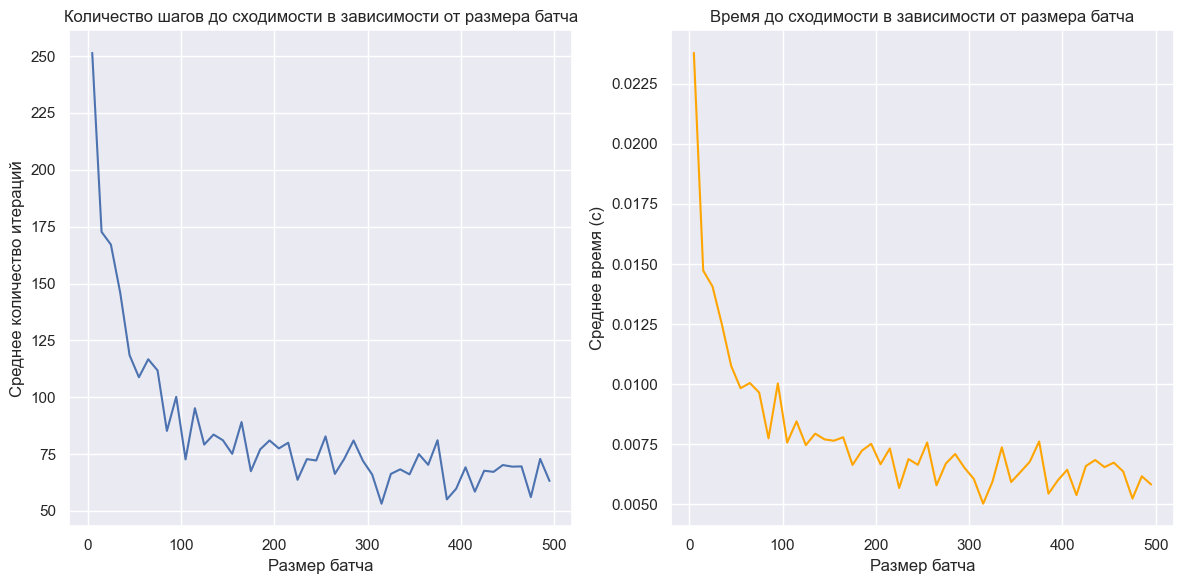

In [69]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(res['batch_size'], res['avg_iterations'])
plt.title('Количество шагов до сходимости в зависимости от размера батча')
plt.xlabel('Размер батча')
plt.ylabel('Среднее количество итераций')

plt.subplot(1, 2, 2)
plt.plot(res['batch_size'], res['avg_time'], color='orange')
plt.title('Время до сходимости в зависимости от размера батча')
plt.xlabel('Размер батча')
plt.ylabel('Среднее время (с)')

plt.tight_layout()
plt.show()

Чем больше размер батча, тем быстрее модель находит оптимальные параметры. Это объясняется тем, что большие батчи обеспечивают более точные обновления.

Кроме того, увеличение размера батча приводит к уменьшению количества шагов, необходимых для достижения сходимости. Это также логично, поскольку большие батчи дают более адекватные изменения.

## Задание 7. Регуляризация (1 балл)

В этом задании вам предстоит исследовать влияние регуляризации на работу различных методов градиентного спуска. Напомним, регуляризация - это добавка к функции потерь, которая штрафует за норму весов. Мы будем использовать l2 регуляризацию, таким образом функция потерь приобретает следующий вид:

$$
    Q(w) = \dfrac{1}{\ell} \sum\limits_{i=1}^{\ell} (a_w(x_i) - y_i)^2 + \dfrac{\mu}{2} \| w \|^2
$$

Допишите класс **BaseDescentReg** в файле `descents.py`.

Протестируйте ваше решение в контесте.

Вставьте ссылку на успешную посылку:

* **BaseDescentReg**:

https://contest.yandex.ru/contest/54610/run-report/124665272/

Найдите лучшие параметры обучения с регуляризацией аналогично 5 заданию. Будем подбирать длину шага $\lambda$ (`lambda_`) и коэффициент регуляризации $\mu$ (`mu`).

Сравните для каждого метода результаты с регуляризацией и без регуляризации (нужно опять сохранить ошибку и качество по метрике $R^2$ на обучающей и тестовой выборках и количество итераций до сходимости).

Постройте для каждого метода график со значениями функции потерь MSE с регуляризацией и без регуляризации (всего должно получиться 4 графика).

Посмотрите на получившиеся результаты. Какие можно сделать выводы, как регуляризация влияет на сходимость? Как изменилось качество на обучающей выборке? На тестовой? Чем вы можете объяснить это?

In [70]:
def train_regularized_model(descent_name, lambda_, mu, X_train, y_train, X_val, y_val, X_test, y_test):
    descent_config = {
        'descent_name': descent_name,
        'regularized': True,
        'kwargs': {
            'dimension': X_train.shape[1],
            'lambda_': lambda_,
            'mu': mu
        }
    }
    
    model = LinearRegression(descent_config=descent_config)
    model.fit(X_train, y_train.to_numpy())
    
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)
    y_test_pred = model.predict(X_test)
    
    train_mse = ((y_train - y_train_pred) ** 2).mean()
    val_mse = ((y_val - y_val_pred) ** 2).mean()
    test_mse = ((y_test - y_test_pred) ** 2).mean()
    
    r2_train = r2_score(y_train.to_numpy(), y_train_pred)
    r2_val = r2_score(y_val.to_numpy(), y_val_pred)
    r2_test = r2_score(y_test.to_numpy(), y_test_pred)

    return train_mse, val_mse, test_mse, r2_train, r2_val, r2_test, model.loss_history


func = ['full', 'stochastic', 'momentum', 'adam']
lambdas = np.logspace(-5, -0.5, 7)
mus = np.logspace(-5, 0.5, 7)

results_r = {i: {} for i in func}

for descent_name in func:
    best_lambda = None
    best_valid_error = np.inf
    best_mu = None
    
    for lambda_ in lambdas:
        for mu in mus:
            train_mse, val_mse, test_mse, r2_train, r2_val,  r2_test, loss_history = train_regularized_model(descent_name, lambda_, mu, X_train, y_train, X_val, y_val, X_test, y_test)
            
            if val_mse < best_valid_error:

                best_valid_error = val_mse
                best_lambda = lambda_
                best_mu = mu

                results_r[descent_name] = {
                    'method': descent_name,
                    'mu':best_mu, 
                    'lambda': best_lambda,
                    'train_error': train_error,
                    'test_error': test_error,
                    'r2_train': r2_train,
                    'r2_test': r2_test,
                    'loss_history': loss_history,
                    'iters':len(loss_history)
                }

results_r

{'full': {'method': 'full',
  'mu': np.float64(0.046415888336127774),
  'lambda': np.float64(0.31622776601683794),
  'train_error': np.float64(0.23187132581771044),
  'test_error': np.float64(0.23090347986263726),
  'r2_train': 0.44840511999559207,
  'r2_test': 0.43718320603502403,
  'loss_history': [np.float64(25.4021480938064),
   np.float64(11.271910562333911),
   np.float64(2.2011844999122823),
   np.float64(0.6267750376549447),
   np.float64(0.5610320325419486),
   np.float64(0.535185767893078),
   np.float64(0.5165698235360522),
   np.float64(0.5016090531431096),
   np.float64(0.48905293877340966),
   np.float64(0.47821610071722714),
   np.float64(0.4686807997343436),
   np.float64(0.46017246213665847),
   np.float64(0.45249962985890196),
   np.float64(0.4455224266616184),
   np.float64(0.4391348231024443),
   np.float64(0.43325405777692033),
   np.float64(0.4278139970439888),
   np.float64(0.42276077864634987),
   np.float64(0.41804984257964717),
   np.float64(0.4136438399548834

In [71]:
results_list = []
for method, metrics in results_r.items():
    if metrics: 
        results_list.append(metrics)

results_r_df = pd.DataFrame(results_list)
results_r_df

,method,mu,lambda,train_error,test_error,r2_train,r2_test,loss_history,iters
0,full,0.046416,0.316228,0.231871,0.230903,0.448405,0.437183,"[25.4021480938064, 11.271910562333911, 2.20118...",46
1,stochastic,0.005623,0.316228,0.231871,0.230903,0.509398,0.500675,"[38.93204840617322, 19.852085748446484, 2.3927...",75
2,momentum,0.046416,0.316228,0.231871,0.230903,0.629076,0.624741,"[36.47178879662714, 16.167291152180074, 52.966...",160
3,adam,0.000681,0.316228,0.231871,0.230903,0.633917,0.627667,"[26.268761958851652, 14.200979624622972, 7.282...",71


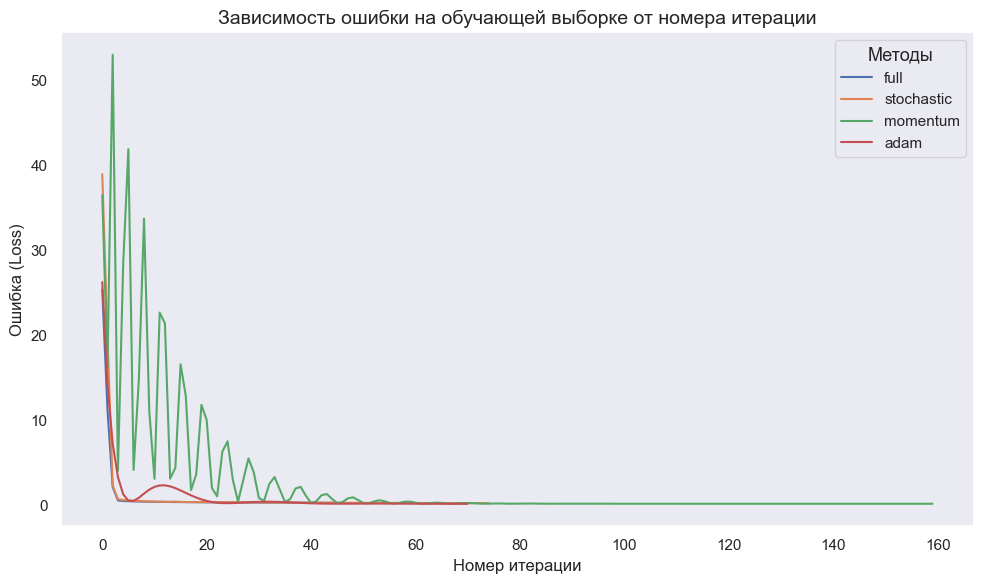

In [72]:
plt.figure(figsize=(10, 6)) 

for method, r in results_r.items():
    index = range(len(r['loss_history'])) 
    plt.plot(index, r['loss_history'], label=method)

plt.title('Зависимость ошибки на обучающей выборке от номера итерации', fontsize=14)
plt.xlabel('Номер итерации', fontsize=12)
plt.ylabel('Ошибка (Loss)', fontsize=12)

plt.grid()
plt.legend(title='Методы', title_fontsize='13', fontsize='11')
plt.tight_layout()
plt.show()

`### ваше решение тут ###`

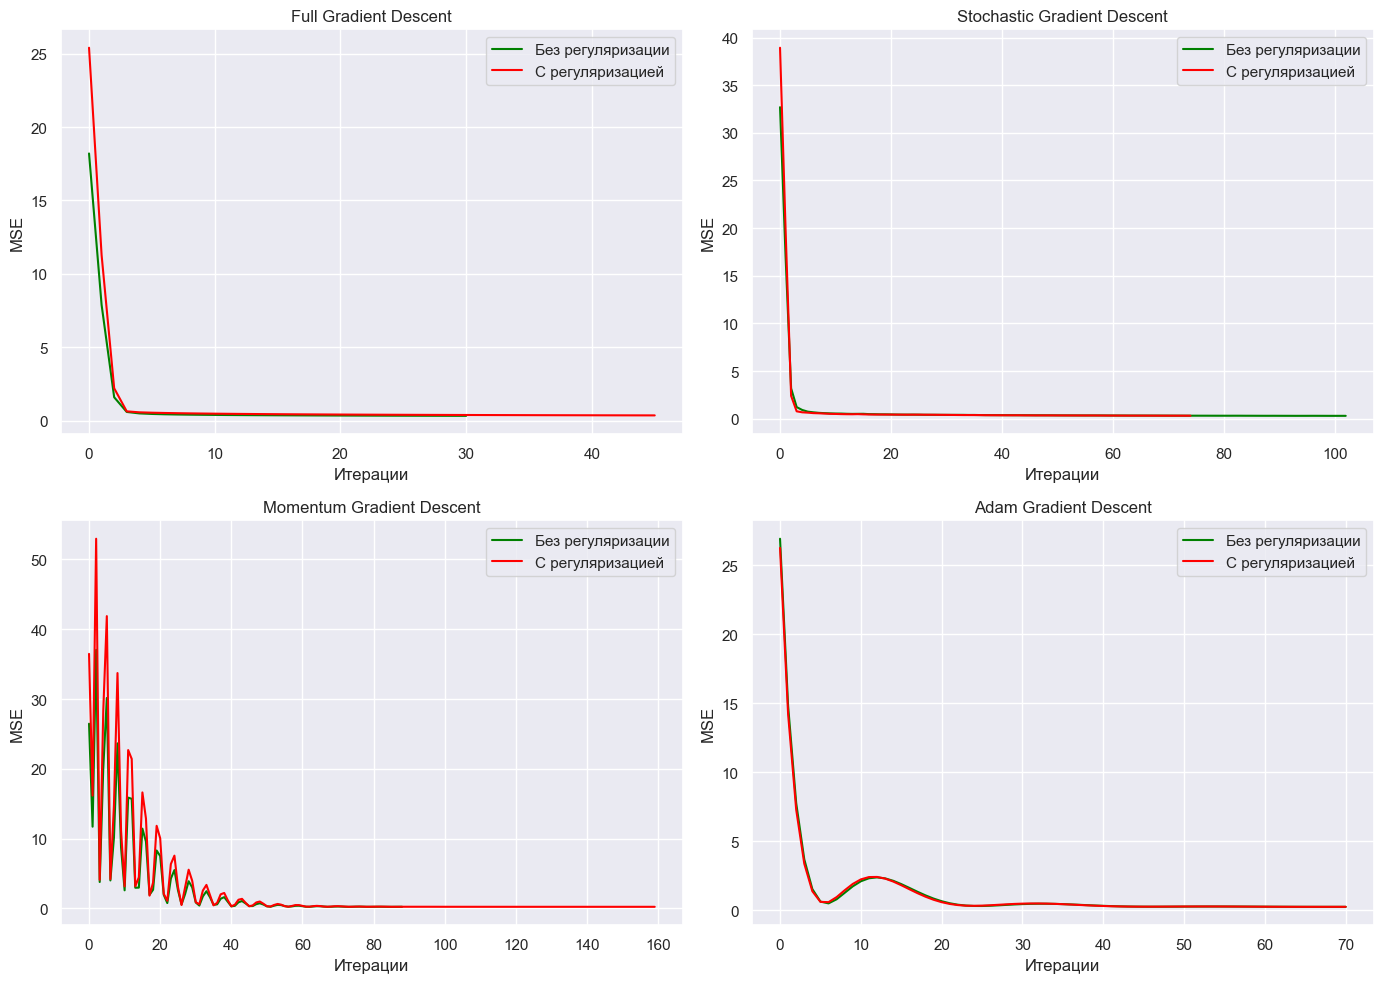

In [73]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for i, method in enumerate(func):
    d1 = results[method]['loss_history']
    d2= results_r[method]['loss_history']
    axes[i].plot(d1, label='Без регуляризации', color='green')
    axes[i].plot(d2, label='С регуляризацией', color='red')
    axes[i].set_title(f'{method.capitalize()} Gradient Descent')
    axes[i].set_xlabel('Итерации')
    axes[i].set_ylabel('MSE')
    axes[i].legend()

plt.tight_layout()
plt.show()

При введении регуляризации увеличилось количество итераций, а также улучшились значения R2 как на тестовой, так и на тренировочной выборках. Среднеквадратичная ошибка (MSE) значительно снизилась, что может быть связано с тем, что регуляризация накладывает штраф за слишком большие значения весов, что предотвращает переобучение модели

## Задание 8. Альтернативная функция потерь (1 балл)

В этом задании вам предстоит использовать другую функцию потерь для нашей задачи регрессии. В качестве функции потерь мы выбрали **Log-Cosh**:

$$
    L(y, a)
    =
    \log\left(\cosh(a - y)\right).
$$

Самостоятельно продифференцируйте данную функцию потерь чтобы найти её градиент _(требуется показать не только результат, но и промежуточные вычисления)_:

`### ваше решение тут ###`

Имеем: 
$$
L(y, w) = \frac{1}{l} \log(\cosh(Xw - y)),
$$

$$
\frac{dL}{dr} = \frac{1}{l} \frac{1}{\cosh(r)} \cdot \frac{d(\cosh(r))}{dr} = \frac{1}{l} \frac{1}{\cosh(r)} \cdot \sinh(r)
$$, где $r = Xw - y$

$$
\frac{dL}{dr} = \frac{1}{l} \frac{\sinh(r)}{\cosh(r)} = \frac{1}{l} \tanh(r).
$$


производная  r по w:

$$
r = Xw - y \implies \frac{dr}{dw} = X.
$$

тогда получим:
$$
\frac{dL}{dw} = \frac{1}{l} \frac{dL}{dr} \cdot \frac{dr}{dw} = \frac{1}{l}\tanh(r) \cdot X.
$$

Таким образом:

$$
\nabla L(y, w) =  \frac{1}{l} X^T \cdot \tanh(Xw - y).
$$


Программно реализуйте градиентный спуск с данной функцией потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Пример того, как можно запрограммировать использование нескольких функций потерь внутри одного класса градиентного спуска:


```python
from enum import auto
from enum import Enum

import numpy as np

class LossFunction(Enum):
    MSE = auto()
    MAE = auto()
    LogCosh = auto()
    Huber = auto()

...
class BaseDescent:
    def __init__(self, loss_function: LossFunction = LossFunction.MSE):
        self.loss_function: LossFunction = loss_function

    def calc_gradient(self, x: np.ndarray, y: np.ndarray) -> np.ndarray:
        if self.loss_function is LossFunction.MSE:
            return ...
        elif self.loss_function is LossFunction.LogCosh:
            return ...
...

```

In [74]:
from descents import LossFunction

In [75]:
def train_model_log_cosh(descent_name, lambda_, X_train, y_train, X_val, y_val, X_test, y_test):
    descent_config = {
        'descent_name': descent_name,
        'kwargs': {'dimension': X_train.shape[1], 'lambda_': lambda_, 'loss_function': LossFunction.LogCosh}
    }

    model = LinearRegression(descent_config=descent_config)
    model.fit(X_train, y_train.to_numpy())
    
    valid_error = model.calc_loss(X_val, y_val.to_numpy())
    train_error = model.calc_loss(X_train, y_train.to_numpy())
    test_error = model.calc_loss(X_test, y_test.to_numpy())
    
    Y_train_pred = model.predict(X_train)
    Y_test_pred = model.predict(X_test)
    
    r2_train = r2_score(y_train, Y_train_pred)
    r2_test = r2_score(y_test, Y_test_pred)
    
    return valid_error, train_error, test_error, r2_train, r2_test, model.loss_history

func = ['full', 'stochastic', 'momentum', 'adam']
lambda_values = np.logspace(-5, 0.5, 7)
results_logcosh = {i: {'lambda': None, 'train_error': None, 'test_error': None, 'r2_train': None, 'r2_test': None, 'iterations': None} for i in func}

for descent_name in func:
    best_lambda = None
    best_valid_error = np.inf
    best_metrics = {}

    for lambda_ in lambda_values:
        val_mse, train_error, test_error, r2_train, r2_test, loss_history = train_model_log_cosh(descent_name, lambda_, X_train, y_train, X_val, y_val, X_test, y_test)

        if val_mse < best_valid_error:
            best_valid_error = val_mse
            best_lambda = lambda_

            results_logcosh[descent_name] = {
                'method': descent_name,
                'lambda': best_lambda,
                'train_error': train_error,
                'test_error': test_error,
                'r2_train': r2_train,
                'r2_test': r2_test,
                'loss_history': loss_history,
                'iters':len(loss_history)
            }


results_logcosh

{'full': {'method': 'full',
  'lambda': np.float64(3.1622776601683795),
  'train_error': np.float64(0.11054559519450781),
  'test_error': np.float64(0.1120748150058131),
  'r2_train': 0.5726140363469214,
  'r2_test': 0.563620575696758,
  'loss_history': [np.float64(5.098664299736588),
   np.float64(1.9458621274590537),
   np.float64(2.082737091162854),
   np.float64(2.1968176047982406),
   np.float64(1.3447246589795254),
   np.float64(1.5823335821105613),
   np.float64(1.038770674724224),
   np.float64(1.174321224007965),
   np.float64(0.8454857232804751),
   np.float64(0.9151525894497866),
   np.float64(0.6972303382817346),
   np.float64(0.7290690809832641),
   np.float64(0.5785057741227904),
   np.float64(0.5870939418930732),
   np.float64(0.4803476460186445),
   np.float64(0.47460053637611765),
   np.float64(0.39775612693411266),
   np.float64(0.38369126052413927),
   np.float64(0.3279407903655611),
   np.float64(0.30993528576769885),
   np.float64(0.2695245124121935),
   np.float64

In [76]:
results_list = []
for method, metrics in results_logcosh.items():
    if metrics: 
        results_list.append(metrics)

results_log_df = pd.DataFrame(results_list)
results_log_df

,method,lambda,train_error,test_error,r2_train,r2_test,loss_history,iters
0,full,3.162278,0.110546,0.112075,0.572614,0.563621,"[5.098664299736588, 1.9458621274590537, 2.0827...",63
1,stochastic,3.162278,0.100191,0.101601,0.612797,0.606020,"[4.678255879357869, 2.139956453205756, 2.45931...",301
2,momentum,3.162278,0.098515,0.099442,0.630461,0.625821,"[5.2319431029040855, 1.7778183809054304, 3.519...",93
3,adam,3.162278,0.097911,0.098570,0.633322,0.629673,"[4.749376782037546, 7.290207933009387, 6.70222...",91


In [77]:
results_df

,method,lambda,train_error,test_error,r2_train,r2_test,loss_history,iters
0,full,0.316228,0.320808,0.324570,0.496814,0.484746,"[18.198001594239713, 7.876749549320807, 1.5875...",31
1,stochastic,0.316228,0.298802,0.298891,0.531330,0.525511,"[32.69244292762636, 17.029929034690444, 3.1859...",103
2,momentum,0.316228,0.240449,0.236486,0.622856,0.624579,"[26.467631243904954, 11.71476150177998, 37.046...",89
3,adam,0.316228,0.231871,0.230903,0.636311,0.633441,"[26.933548804780244, 14.812149809904557, 7.760...",71


Заметим, что в случае новой функцмм потерь ошибки стали меньше, градиент с функцией потерь Log-Cosh лучше, чем с MSE, потому что Log-Cosh менее чувствителен к выбросам, что позволяет модели более эффективно обучаться на данных с шумом. Поэтому получили более хорошие в этом смысле результаты

### Кулинарно-социализационный бонус. (0.5 балла).

Как мы знаем, осень прекрасная пора, время пробовать новое и делиться теплом с друзьями и близкими. Выберите рецепт, который соответствует вашему настроению, приготовьте выбранное блюдо и угостите хотя бы одного человека им. Кратко опишите ваши впечатления, прикрепите рецепт и фотографии блюда и довольного гостя.

`### ваш кулинарный опыт тут ###`

![](https://i.ibb.co/FgB7h1P/photo-2024-11-13-17-16-04.jpg)

Коллеги из s617 оценили тирамису, всем очень понравилось!!

Готовила всю ночь, искала маскарпоне в 2 часа ночи, очень старалась, главное, что понравилось))

### Бонус 1. Другие методы градиентного спуска (1 балл).

По желанию выберите метод градиентного спуска из следующего списка и самостоятельно реализуйте его в файле `descents.py`. Обучите линейную регрессию с помощью этого метода, сравните с методами из основной части домашнего задания.

`AdaMax` (вариация Adam основанная на $l_{\infty}$), `Nadam` (вариация Adam совмещенная с методом импульса Нестерова), `AMSGrad` (ещё одна вариация Adam).

In [78]:
func = ['adamax']
lambda_values = np.logspace(0, 5, 20)
results_list_adamax = {i: {} for i in func}

for descent_name in func:
    best_lambda = None
    best_valid_error = np.inf
    
    for lambda_ in lambda_values:
        valid_error, train_error, test_error, r2_train, r2_test, loss_history = train_model(descent_name, lambda_, X_train, y_train, X_val, y_val, X_test, y_test)
        
        if val_mse < best_valid_error:
            best_valid_error = val_mse
            best_lambda = lambda_

            results_list_adamax[descent_name] = {
                'method': descent_name,
                'lambda': best_lambda,
                'train_error': train_error,
                'test_error': test_error,
                'r2_train': r2_train,
                'r2_test': r2_test,
                'loss_history': loss_history,
                'iters':len(loss_history)
            }

results_list_adamax

{'adamax': {'method': 'adamax',
  'lambda': np.float64(1.0),
  'train_error': np.float64(0.23250948635402632),
  'test_error': np.float64(0.23066746627889337),
  'r2_train': 0.6353099294920389,
  'r2_test': 0.6338159559311054,
  'loss_history': [np.float64(27.630191448107734),
   np.float64(1.4968267013941736),
   np.float64(1.6189267842040262),
   np.float64(4.053961915346764),
   np.float64(5.041229780954753),
   np.float64(4.692537306723688),
   np.float64(3.684168242695899),
   np.float64(2.5464872955695803),
   np.float64(1.57506558613607),
   np.float64(0.8845772701928397),
   np.float64(0.4788885393873087),
   np.float64(0.30628084769758857),
   np.float64(0.2959900023525736),
   np.float64(0.3794422450292317),
   np.float64(0.5006816913945982),
   np.float64(0.6198575185375258),
   np.float64(0.7126664705409564),
   np.float64(0.7677546384410852),
   np.float64(0.7833773545401488),
   np.float64(0.7640972198306242),
   np.float64(0.7179373521784972),
   np.float64(0.65416507904

In [79]:
results_list = []
for method, metrics in results_list_adamax.items():
    if metrics: 
        results_list.append(metrics)

results_nadam_df = pd.DataFrame(results_list_adamax).T
results_nadam_df

,method,lambda,train_error,test_error,r2_train,r2_test,loss_history,iters
adamax,adamax,1.0,0.232509,0.230667,0.63531,0.633816,"[27.630191448107734, 1.4968267013941736, 1.618...",56


In [80]:
results_df

,method,lambda,train_error,test_error,r2_train,r2_test,loss_history,iters
0,full,0.316228,0.320808,0.324570,0.496814,0.484746,"[18.198001594239713, 7.876749549320807, 1.5875...",31
1,stochastic,0.316228,0.298802,0.298891,0.531330,0.525511,"[32.69244292762636, 17.029929034690444, 3.1859...",103
2,momentum,0.316228,0.240449,0.236486,0.622856,0.624579,"[26.467631243904954, 11.71476150177998, 37.046...",89
3,adam,0.316228,0.231871,0.230903,0.636311,0.633441,"[26.933548804780244, 14.812149809904557, 7.760...",71


Метод Adamax сошелся быстрее, чем метод Adam из этого же семейства алгоритмов, ошибки получились не больше (сравними только с адамом, а в остльных ошибки сильно больше)

### Бонус 2. Другие функции потерь (1 балл).

Аналогично 8 заданию реализуйте две функции потерь - **MAE** и **Huber**.

Самостоятельно продифференцируйте данные функции потерь, чтобы найти их градиенты _(требуется показать не только результат, но и промежуточные вычисления)_:

`### ваше решение тут ###`

1. MAE определяется как среднее абсолютное значение ошибок между предсказанными значениями и истинными значениями:

$$
\text{MAE}(y, \hat{y}) = \frac{1}{n} \sum_{i=1}^{n} |y_i - x_i * w|
$$


Градиент функции потерь MAE зависит от знака разности $y_i - x_i * w$, мы ьерем производную модула - это линейный функционал, зависящий только от знака перед переменной - элементом вектора весов:

$$
\frac{\partial \text{MAE}}{w} = 
\begin{cases}
\frac{1}{n}x_i, & \text{if } y_i - x_i * w > 0 \\
-\frac{1}{n}x_i, & \text{if } y_i - x_i * w < 0 \\
0, & \text{if } y_i - x_i * w = 0
\end{cases}
$$



2. Huber:

$$
\text{H}(y, w) = 
\begin{cases}
\frac{1}{2} (y_i - x_i * w)^2, & \text{если } |y_i - x_i * w| \leq \delta \\
\delta \cdot (|y_i - x_i * w| - \frac{1}{2} \delta), & \text{иначе}
\end{cases}
$$

На самом деле, хубер состоит из части МАЕ и части MSE, а отдельно по каждому мы гралиент уже выписывали, так что запишем, как будет выглядеть гралиент на каждом из участков:
$$
\frac{\partial \text{H}}{\partial w} = 
\begin{cases}
x_i * w - y_i, & \text{если } |y_i - x_i * w| \leq \delta \\
\delta \cdot \text{sign}(x_i * w - y_i), & \text{если } |y_i - x_i * w| > \delta
\end{cases}
$$

Таким образом, градиент по отношению к весам можно записать как:

$$
\text{g} = 
\begin{cases}
\frac{1}{n} \sum_{i=1}^{n} (x_i * w - y_i) x_i, & \text{if } |y_i - x_i * w| \leq \delta \\
\delta\frac{1}{n} \cdot \text{sign}(y_i -x_i * w) x_i, & \text{else}
\end{cases}
$$

Программно реализуйте градиентный спуск с данными функциями потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Сравните между собой *для каждого метода отдельно* качество для разных функций потерь. Какая оказалась лучше? Как вы думаете почему?

накалякала, но работает с трудом.

In [40]:
from descents import LossFunction

In [ ]:
def train_model_mae(descent_name, lambda_, X_train, y_train, X_val, y_val, X_test, y_test):
    descent_config = {
        'descent_name': descent_name,
        'kwargs': {'dimension': X_train.shape[1], 'lambda_': lambda_, 'loss_function': LossFunction.MAE}
    }

    model = LinearRegression(descent_config=descent_config)
    model.fit(X_train, y_train.to_numpy())
    
    valid_error = model.calc_loss(X_val, y_val.to_numpy())
    train_error = model.calc_loss(X_train, y_train.to_numpy())
    test_error = model.calc_loss(X_test, y_test.to_numpy())
    
    Y_train_pred = model.predict(X_train)
    Y_test_pred = model.predict(X_test)
    
    r2_train = r2_score(y_train, Y_train_pred)
    r2_test = r2_score(y_test, Y_test_pred)
    
    return valid_error, train_error, test_error, r2_train, r2_test, model.loss_history

func = ['full', 'stochastic', 'momentum', 'adam']
lambda_values = np.logspace(-5, 0, 1)
results_mae = {i: {'lambda': None, 'train_error': None, 'test_error': None, 'r2_train': None, 'r2_test': None, 'iterations': None} for i in func}

for descent_name in func:
    best_lambda = None
    best_valid_error = np.inf
    best_metrics = {}

    for lambda_ in lambda_values:
        val_mse, train_error, test_error, r2_train, r2_test, loss_history = train_model_mae(descent_name, lambda_, X_train, y_train, X_val, y_val, X_test, y_test)

        if val_mse < best_valid_error:
            best_valid_error = val_mse
            best_lambda = lambda_

            results_mae[descent_name] = {
                'method': descent_name,
                'lambda': best_lambda,
                'train_error': train_error,
                'test_error': test_error,
                'r2_train': r2_train,
                'r2_test': r2_test,
                'loss_history': loss_history,
                'iters':len(loss_history)
            }


results_mae

In [ ]:
results_list = []
for method, metrics in results_mae.items():
    if metrics: 
        results_list.append(metrics)

results_mae_df = pd.DataFrame(results_list)
results_mae_df

,method,lambda,train_error,test_error,r2_train,r2_test,loss_history,iters
0,full,3.162278,0.120490,0.124765,0.643885,0.628209,"[4.211462716210297, 2.6835860863326393, 1.6556...",65
1,stochastic,3.162278,0.112607,0.116163,0.683394,0.671287,"[4.1309727528467155, 2.7876861673853877, 2.083...",301
2,momentum,3.162278,0.108561,0.112824,0.687444,0.672582,"[4.244871923866502, 2.5452180794104744, 3.6175...",105
3,adam,3.162278,0.108534,0.112811,0.690894,0.676076,"[5.379332967282802, 6.712999381222028, 6.21990...",84


In [41]:
def train_model_huber(descent_name, lambda_, X_train, y_train, X_val, y_val, X_test, y_test):
    descent_config = {
        'descent_name': descent_name,
        'kwargs': {'dimension': X_train.shape[1], 'lambda_': lambda_, 'loss_function': LossFunction.Huber}
    }

    model = LinearRegression(descent_config=descent_config)
    model.fit(X_train, y_train.to_numpy())
    
    valid_error = model.calc_loss(X_val, y_val.to_numpy())
    train_error = model.calc_loss(X_train, y_train.to_numpy())
    test_error = model.calc_loss(X_test, y_test.to_numpy())
    
    Y_train_pred = model.predict(X_train)
    Y_test_pred = model.predict(X_test)
    
    r2_train = r2_score(y_train, Y_train_pred)
    r2_test = r2_score(y_test, Y_test_pred)
    
    return valid_error, train_error, test_error, r2_train, r2_test, model.loss_history

func = ['full', 'stochastic', 'momentum', 'adam']
lambda_values = np.logspace(-5, 0, 7)
results_huber = {i: {'lambda': None, 'train_error': None, 'test_error': None, 'r2_train': None, 'r2_test': None, 'iterations': None} for i in func}

for descent_name in func:
    best_lambda = None
    best_valid_error = np.inf
    best_metrics = {}

    for lambda_ in lambda_values:
        val_mse, train_error, test_error, r2_train, r2_test, loss_history = train_model_huber(descent_name, lambda_, X_train, y_train, X_val, y_val, X_test, y_test)

        if val_mse < best_valid_error:
            best_valid_error = val_mse
            best_lambda = lambda_

            results_huber[descent_name] = {
                'method': descent_name,
                'lambda': best_lambda,
                'train_error': train_error,
                'test_error': test_error,
                'r2_train': r2_train,
                'r2_test': r2_test,
                'loss_history': loss_history,
                'iters':len(loss_history)
            }


results_huber

NotImplementedError: для такой функции ошибок не придумали еще градиент.

In [ ]:
results_list = []
for method, metrics in results_huber.items():
    if metrics: 
        results_list.append(metrics)

results_huber_df = pd.DataFrame(results_list)
results_huber_df